<a href="https://colab.research.google.com/github/bmnds/uea-data-science-03-statistics/blob/main/%5BEstat%C3%ADstica03%5D_Amostragem_e_Infer%C3%AAncia_para_Ci%C3%AAncia_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Amostragem e Inferência Estatística

In [1]:
# Pacotes necessários
import pandas as pd
import numpy as np
import statistics as st
import seaborn as se
import statsmodels.stats.proportion as smp
from scipy import stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
bdenade = pd.read_csv('https://drive.google.com/uc?export=download&id=1DrDZTBlf5VKGj89t49pEmyKmgzYEarIZ',sep=';',decimal=',')
bdenade

,Ano,Codigo_Area,Codigo_IES,Categoria_Administrativa,Nconcluintes_Inscritos,Nconcluintes_Participantes,NotaBruta_FG,NotaBruta_CE,ConceitoEnade_Continuo,ConceitoEnade_Faixa
0,2017,21,4,Federal,64,50,60.36,54.71,3.35,4.0
1,2017,21,452,Privada,5,5,46.60,35.38,1.04,2.0
2,2017,21,669,Privada,70,64,45.57,35.05,0.97,2.0
3,2017,21,1422,Privada,250,130,47.18,37.23,1.23,2.0
4,2017,21,2147,Privada,250,190,40.09,33.75,0.64,1.0
...,...,...,...,...,...,...,...,...,...,...
610,2018,85,1422,Privada,8,6,45.90,43.95,2.66,3.0
611,2018,87,1422,Privada,21,21,32.03,46.08,2.73,3.0
612,2018,86,669,Privada,31,31,36.45,42.13,2.05,3.0
613,2018,38,322,Privada,16,8,37.98,37.98,1.64,2.0


In [3]:
# Verificar quantidades de linhas e colunas
bdenade.shape

(615, 10)

In [4]:
# Mudança da semente aleatória randômica para manter os resultados em várias execuções
np.random.seed(999)

In [5]:
# 615 amostras, de 0 a 1, com reposição, probabilidades equivalentes
amostra = np.random.choice(a = [0, 1], size = 615, replace = True,
                           p = [0.3, 0.7])
amostra
# Tamanho da amostra
print("amostra geral = ",len(amostra))
# Verificar o tamanho de cada amostra
print("amostra 0 = ",len(amostra[amostra == 0]))
print("amostra 1 = ", len(amostra[amostra == 1]))

amostra geral =  615
amostra 0 =  187
amostra 1 =  428


In [6]:
# Amostras sorteadas:
print(amostra)

[1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 1
 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1
 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1
 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0
 0 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1
 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 1
 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0
 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 0
 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1
 1 1 1 1 1 0 1 1 1 1 0 1 

In [7]:
bd_final1 = bdenade.loc[amostra == 0]
bd_final1.shape

(187, 10)

In [8]:
bd_final2 = bdenade.loc[amostra == 1]
bd_final2

,Ano,Codigo_Area,Codigo_IES,Categoria_Administrativa,Nconcluintes_Inscritos,Nconcluintes_Participantes,NotaBruta_FG,NotaBruta_CE,ConceitoEnade_Continuo,ConceitoEnade_Faixa
0,2017,21,4,Federal,64,50,60.36,54.71,3.35,4.0
1,2017,21,452,Privada,5,5,46.60,35.38,1.04,2.0
3,2017,21,1422,Privada,250,130,47.18,37.23,1.23,2.0
5,2017,72,1381,Privada,32,30,42.53,30.17,1.58,2.0
6,2017,72,1422,Privada,69,7,50.10,49.34,3.57,4.0
...,...,...,...,...,...,...,...,...,...,...
607,2018,22,3172,Estadual,27,22,53.26,41.82,3.48,4.0
609,2018,87,1381,Privada,5,3,49.03,48.37,3.57,4.0
610,2018,85,1422,Privada,8,6,45.90,43.95,2.66,3.0
611,2018,87,1422,Privada,21,21,32.03,46.08,2.73,3.0


Intervalo de Confiança para Média

In [9]:
# Pacote necessário
from scipy.stats import t,norm

In [10]:
# Deseja-se avaliar o diâmetro em mm dos parafusos utilizados na fixação da placa mãe em gabinetes para CPU de determinada empresa. Uma amostra de dez corpos de prova de parafuso foram avaliados:
# {3,48; 3,50; 3,48; 3,49; 3,49; 3,48; 3,50; 3,51; 3,49; 3,50}
x = (3.48,3.5,3.48,3.49,3.49,3.48,3.5,3.51,3.49,3.50)
#x = (36,36,37,36,35,35,36,36,37,37)
print("média=",round(st.mean(x),3))
print("desvio-padrão=",round(st.stdev(x),3))

média= 3.492
desvio-padrão= 0.01


In [11]:
# a) Intervalo de Confiança ao nível de 95%;
print("Intervalo de Confiança ao nível de 95% para média quando a variância é desconhecida")
inf,sup = t.interval(0.95, len(x)-1, loc=st.mean(x), scale=st.stdev(x)/np.sqrt(len(x)))
print ('Limite inferior 95%:', round(inf,3))
print ('Limite superior 95%:', round(sup,3))


Intervalo de Confiança ao nível de 95% para média quando a variância é desconhecida
Limite inferior 95%: 3.485
Limite superior 95%: 3.499


In [12]:

# b)	A amostra foi suficiente, levando em consideração um erro máximo de 0,01 mm ao nível de 95%?
# n = t2*s2/e2
n = (t.ppf(0.005,9)**2)*(st.stdev(x)**2)/(0.3**2)
print("Tamanho da amostra =",round(n))

Tamanho da amostra = 0.0


In [13]:
# No caso da variância conhecida, por exemplo sigma ao quadrado = 0,05, a função fica:
print("Intervalo de Confiança ao nível de 95% para média quando a variância é conhecida")                                              
inf, sup = norm.interval(0.95, loc=st.mean(x), scale=0.05/np.sqrt(len(x)))
print ('Limite inferior:', round(inf,3))
print ('Limite superior:', round(sup,3))

Intervalo de Confiança ao nível de 95% para média quando a variância é conhecida
Limite inferior: 3.461
Limite superior: 3.523


Intervalo de Confiança para Proporção

In [14]:
# Pacote necessário
import statsmodels.stats.proportion as prop


In [15]:
# Arthur
# Na avaliação de dois sistemas computacionais, A e B, foram selecionadas 400 cargas de trabalho (tarefas) – supostamente uma amostra aleatória da infinidade de cargas de trabalho que poderiam ser submetidas a esses sistemas. O sistema A foi melhor que o B em 240 dos casos. Construir um intervalo de confiança para p (proporção de vezes que o sistema A é melhor que o sistema B, considerando todas as possíveis cargas de trabalho) ao nível de 95%. É possível diminuir o custo com amostragem trabalhando com erro amostral de 3%?
inf, sup = prop.proportion_confint (485, 1000, alpha=0.05, method='normal')
print ('Limite inferior:', round(inf,2))
print ('Limite superior:', round(sup,2))
print ('Margem de erro:',round(sup-0.485,2))

Limite inferior: 0.45
Limite superior: 0.52
Margem de erro: 0.03


In [16]:
# Marcelo
# Na avaliação de dois sistemas computacionais, A e B, foram selecionadas 400 cargas de trabalho (tarefas) – supostamente uma amostra aleatória da infinidade de cargas de trabalho que poderiam ser submetidas a esses sistemas. O sistema A foi melhor que o B em 240 dos casos. Construir um intervalo de confiança para p (proporção de vezes que o sistema A é melhor que o sistema B, considerando todas as possíveis cargas de trabalho) ao nível de 95%. É possível diminuir o custo com amostragem trabalhando com erro amostral de 3%?
inf, sup = prop.proportion_confint (515, 1000, alpha=0.05, method='normal')
print ('Limite inferior:', round(inf,2))
print ('Limite superior:', round(sup,2))
print ('Margem de erro:',round(sup-0.515,2))

Limite inferior: 0.48
Limite superior: 0.55
Margem de erro: 0.03


In [17]:
# Tamanho da amostra:
n = (norm.ppf(0.975)**2)*0.515*0.485/(0.025**2)
round(n)

1535.0

Atividade prática com o banco de dados bdenade

In [18]:
## Explorar o banco de dados
bdenade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Ano                         615 non-null    int64  
 1   Codigo_Area                 615 non-null    int64  
 2   Codigo_IES                  615 non-null    int64  
 3   Categoria_Administrativa    615 non-null    object 
 4   Nconcluintes_Inscritos      615 non-null    int64  
 5   Nconcluintes_Participantes  615 non-null    int64  
 6   NotaBruta_FG                615 non-null    float64
 7   NotaBruta_CE                615 non-null    float64
 8   ConceitoEnade_Continuo      615 non-null    float64
 9   ConceitoEnade_Faixa         615 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 48.2+ KB


In [19]:
# Renomear as colunas
bdenade.columns = ["ano","area","ies","esfera","ninscritos","nparticipantes","notafg","notace","conceito","nota"]
bdenade

,ano,area,ies,esfera,ninscritos,nparticipantes,notafg,notace,conceito,nota
0,2017,21,4,Federal,64,50,60.36,54.71,3.35,4.0
1,2017,21,452,Privada,5,5,46.60,35.38,1.04,2.0
2,2017,21,669,Privada,70,64,45.57,35.05,0.97,2.0
3,2017,21,1422,Privada,250,130,47.18,37.23,1.23,2.0
4,2017,21,2147,Privada,250,190,40.09,33.75,0.64,1.0
...,...,...,...,...,...,...,...,...,...,...
610,2018,85,1422,Privada,8,6,45.90,43.95,2.66,3.0
611,2018,87,1422,Privada,21,21,32.03,46.08,2.73,3.0
612,2018,86,669,Privada,31,31,36.45,42.13,2.05,3.0
613,2018,38,322,Privada,16,8,37.98,37.98,1.64,2.0


In [20]:
## Caso tivesse um id, poderíamos indexar
# bdenade.set_index('id', inplace=True)
# bdenade.head(10)

In [21]:
# selecionar um registro específico
bdenade.loc[0]

ano                  2017
area                   21
ies                     4
esfera            Federal
ninscritos             64
nparticipantes         50
notafg              60.36
notace              54.71
conceito             3.35
nota                    4
Name: 0, dtype: object

In [22]:
# Tabulação de dados
categoriadm = bdenade.groupby(['esfera']).size()
categoriadm

esfera
Estadual     73
Federal     130
Privada     412
dtype: int64

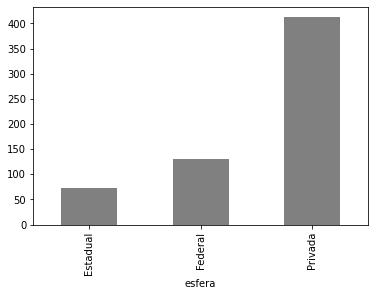

In [23]:
# gráfico de colunas
categoriadm.plot.bar(color = 'gray')

In [24]:
# Explorar dados numéricos
bdenade['conceito'].describe()

count    615.000000
mean       1.893203
std        0.924821
min        0.000000
25%        1.265000
50%        1.780000
75%        2.460000
max        4.630000
Name: conceito, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Box-plot do conceito ENADE contínuo')

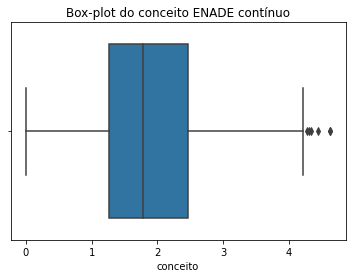

In [25]:
se.boxplot(bdenade['conceito']).set_title('Box-plot do conceito ENADE contínuo')

In [26]:
# Verificar os registros acima de 4
bdenade4 = bdenade.query('conceito > 4')
bdenade4

,ano,area,ies,esfera,ninscritos,nparticipantes,notafg,notace,conceito,nota
125,2017,5710,4,Federal,60,53,65.91,57.53,4.08,5.0
179,2016,6,4,Federal,23,23,55.04,72.01,4.21,5.0
203,2016,51,4,Federal,8,6,55.43,52.33,4.05,5.0
225,2016,3501,4,Federal,13,12,58.67,54.23,4.30,5.0
259,2015,1,3172,Estadual,86,68,66.00,48.92,4.01,5.0
262,2015,2,4,Federal,149,135,70.82,58.68,4.63,5.0
304,2015,84,322,Privada,7,4,64.23,59.10,4.13,5.0
333,2015,102,322,Privada,9,7,66.50,52.80,4.16,5.0
357,2019,6,4,Federal,20,20,54.67,71.98,4.63,5.0
446,2019,5806,4,Federal,21,11,59.31,47.15,4.27,5.0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histograma do conceito ENADE contínuo')

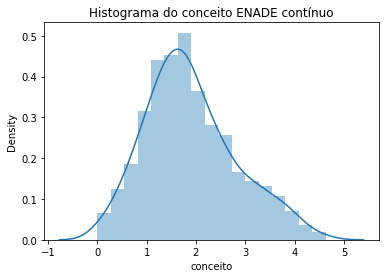

In [27]:
se.distplot(bdenade['conceito']).set_title('Histograma do conceito ENADE contínuo')

In [28]:
n=len(bdenade)
media=st.mean(bdenade['conceito'])
dp=st.stdev(bdenade['conceito'])
inf,sup = t.interval(0.95, len(bdenade)-1, loc=media, scale=dp/np.sqrt(n))
print ('Limite inferior:', round(inf,2))
print ('Limite superior:', round(sup,2))

Limite inferior: 1.82
Limite superior: 1.97


In [29]:
stats.shapiro(bdenade['conceito'])

(0.9768791794776917, 2.8186013523168185e-08)

In [30]:
# Tratamento de outliers por meio do desvio-padrão
dp = st.stdev(bdenade['conceito'])
dp

0.9248209524692955

In [31]:
# Definir como padrão 2 ou mais desvio-padrão
bdenade.loc[bdenade['conceito'] >=  2 * dp] 

,ano,area,ies,esfera,ninscritos,nparticipantes,notafg,notace,conceito,nota
0,2017,21,4,Federal,64,50,60.36,54.71,3.35,4.0
6,2017,72,1422,Privada,69,7,50.10,49.34,3.57,4.0
7,2017,72,1436,Privada,12,6,39.82,34.00,1.85,2.0
8,2017,72,1812,Federal,45,40,50.05,46.28,3.29,4.0
9,2017,72,3172,Estadual,23,17,55.58,43.24,3.19,4.0
...,...,...,...,...,...,...,...,...,...,...
609,2018,87,1381,Privada,5,3,49.03,48.37,3.57,4.0
610,2018,85,1422,Privada,8,6,45.90,43.95,2.66,3.0
611,2018,87,1422,Privada,21,21,32.03,46.08,2.73,3.0
612,2018,86,669,Privada,31,31,36.45,42.13,2.05,3.0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Box-plot do conceito ENADE contínuo por Esfera Administrativa')

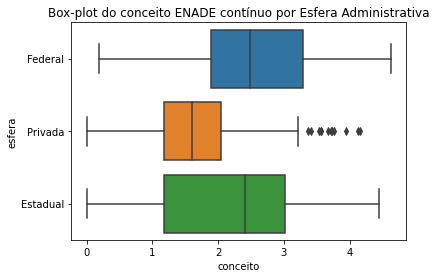

In [32]:
se.boxplot(bdenade['conceito'],bdenade['esfera']).set_title('Box-plot do conceito ENADE contínuo por Esfera Administrativa')
#bdenade.boxplot("conceito",by="esfera",grid=False).set_title('Box-plot do conceito ENADE contínuo por Esfera Administrativa')

In [33]:
# Análise descritiva em relação a esfera
resumo = bdenade.groupby('esfera').agg({'conceito':['describe']})
resumo

conceito                                                     
         describe                                                     
            count      mean       std   min    25%   50%     75%   max
esfera                                                                
Estadual     73.0  2.161644  1.177799  0.01  1.170  2.41  3.0100  4.45
Federal     130.0  2.537769  0.983383  0.19  1.895  2.48  3.2875  4.63
Privada     412.0  1.642257  0.723782  0.00  1.180  1.60  2.0425  4.16

In [34]:
# Intervalo de Confiança para a variável conceito
n=len(bdenade)
media=st.mean(bdenade['conceito'])
dp=st.stdev(bdenade['conceito'])
inf,sup = t.interval(0.95, len(bdenade)-1, loc=media, scale=dp/np.sqrt(n))
print ('Limite inferior:', round(inf,2))
print ('Limite superior:', round(sup,2))

Limite inferior: 1.82
Limite superior: 1.97


In [35]:
# Seleção dos dados da esfera Estadual
bdprivada=bdenade.query('esfera=="Privada"')

In [36]:
bdprivada.head

<bound method NDFrame.head of       ano  area   ies   esfera  ...  notafg  notace  conceito  nota
1    2017    21   452  Privada  ...   46.60   35.38      1.04   2.0
2    2017    21   669  Privada  ...   45.57   35.05      0.97   2.0
3    2017    21  1422  Privada  ...   47.18   37.23      1.23   2.0
4    2017    21  2147  Privada  ...   40.09   33.75      0.64   1.0
5    2017    72  1381  Privada  ...   42.53   30.17      1.58   2.0
..    ...   ...   ...      ...  ...     ...     ...       ...   ...
610  2018    85  1422  Privada  ...   45.90   43.95      2.66   3.0
611  2018    87  1422  Privada  ...   32.03   46.08      2.73   3.0
612  2018    86   669  Privada  ...   36.45   42.13      2.05   3.0
613  2018    38   322  Privada  ...   37.98   37.98      1.64   2.0
614  2018    94   322  Privada  ...   36.97   42.89      2.43   3.0

[412 rows x 10 columns]>

In [37]:
bdprivada['conceito'].describe()

count    412.000000
mean       1.642257
std        0.723782
min        0.000000
25%        1.180000
50%        1.600000
75%        2.042500
max        4.160000
Name: conceito, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


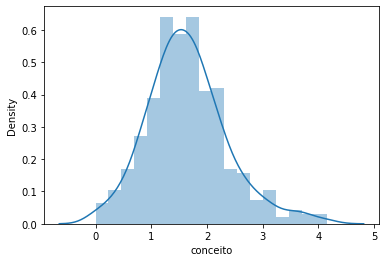

In [38]:
se.distplot(bdprivada['conceito'])

# Atividade Avaliativa III - Distribuições Contínuas e Inferência

In [39]:
from scipy.stats import binom, nbinom, poisson, uniform, expon, norm 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
import statistics as st
import statsmodels.stats.proportion as prop
from scipy import stats
import math

Q1. Um ponto é escolhido ao acaso no segmento de reta [1,4]. Qual a probabilidade de que o ponto escolhido esteja entre 0,5 e 2,5?

In [40]:
# distribuição uniforme com probabilidade acumulada
# Considerando que para valores menores do que 1 a probabilidade é sempre zero,
# basta calcularmos a probabilidade acumulada até 
a = 1
b = 4
uniform.cdf(2.5, a, b-a)

0.5

Q2. O tempo de vida (em horas) de um transístor é uma variável aleatória T com distribuição exponencial. O tempo médio de vida do transístor é de 500 horas. Qual a probabilidade de o transístor durar entre 300 e 1000 horas?


In [41]:
# distribuição exponencial com probabilidade acumulada
# a escala é E[t] = 1/lambda
# P(300<T<1000) = P(T>300) - P(T>1000)
expon.cdf(1000,scale=500)-expon.cdf(300,scale=500)

0.4134763528574137

Q3. Se as interrupções no suprimento de energia elétrica ocorrem segundo uma distribuição de Poisson com a média de uma interrupção por mês (quatro semanas). Qual a probabilidade de que entre duas interrupções consecutivas ocorram em um intervalo de menos de uma semana?

In [42]:
# distribuição de poisson com 1/4 da frequência fornecida, pois é semana ao invés de mês
print("P(x=2):",1-poisson.cdf(0,1/4))

P(x=2): 0.22119921692859512


Q4. As notas de uma prova de estatística em uma turma do ensino superior são normalmente distribuídas com média 6,0 e variância 16,0. Qual a probabilidade de um aluno tirar uma nota entre 7,0 e 8,0?

In [45]:
# distribuição normal
u = 6.0
v = 16.0
d = math.sqrt(v) #4.0
p = norm.cdf(8,u,d)-norm.cdf(7,u,d)
print('P(7<x<8) = ' + str(p))

P(7<x<8) = 0.09275613559108942


Q5. Uma enchedora automática de garrafas de refrigerante esta regulada para que o volume médio de líquido em cada garrafa seja de 1000 cm3 e o desvio-padrão de 10 cm3. Qual deve ser a medida mínima para um técnico escolher 5% das garrafas que não completaram 1000 cm3?

In [46]:
# distribuição normal
norm.ppf(0.05,1000,10)

983.5514637304852

Q6. Existe vários algoritmos computacionais que permitem gerar números aleatórios (ou, mais apropriadamente, pseudo-aleatórios) no intervalo [0,1], com distribuição uniforme. Considere a geração de 100 números (X1, X2, ...,X100) desta forma. Qual é o valor da média e da variância de Xi?

In [47]:
# distribuição uniforme
media = (1-0)/2
print('media', media)
variancia = math.pow(1-0, 2)/12
print('variancia', variancia)

media 0.5
variancia 0.08333333333333333


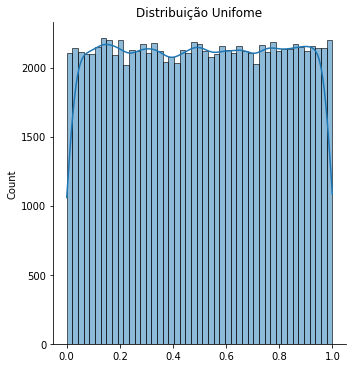

	Mediana: 0.5010921060309035
	Variância amostral: 0.08369504482795316


In [48]:
# prova dos 9

import statistics as st
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

duniform = random.uniform(0,1, size=100000)
sns.displot(duniform, kde=True)
plt.title('Distribuição Unifome')
plt.show()

print("\tMediana:", st.median(duniform))
print("\tVariância amostral:", st.variance(duniform))

Q7. Com o objetivo de avaliar a confiabilidade de um novo sistema de transmissão de dados, torna-se necessário verificar a proporção de bits transmitidos com erro em cada lote de 100 Mb. Considere que seja tolerável um erro amostral de máximo de 2% e que em sistemas similares a taxa de erro na transmissão é de 10%. Qual deve ser o tamanho da amostra ao nível de 95%?

In [49]:
# proporção
a = 0.05
z = norm.ppf(1-a/2)
e = 0.02
p = 0.1
n = z**2*p*(1-p)/e**2
math.ceil(n)

865

Q8. Em 400 simulações de determinado equipamento, foram obtidos 80 sucessos. Qual o intervalo de confiança ao nível de 95% para a proporção de sucessos.

In [50]:
# proporção
a = 1-0.95
n = 400
e = 80

inf, sup = prop.proportion_confint (e, n, alpha=a, method='normal')
print ('IC95%(', round(inf*100,2), ';', round(sup*100, 2), ')')
print ('Margem de erro:',round((sup-inf)*100/2,2))

IC95%( 16.08 ; 23.92 )
Margem de erro: 3.92


Q9. Do total de válvulas fabricadas por uma companhia retira-se uma amostra de 30 válvulas, e obtém-se a vida média de 800h com desvio-padrão de 100h. Qual o intervalo de confiança de 99% para a vida média da população?

In [51]:
# t-student com média e desvio-padrão conhecidos
n = 30
a = 0.01
mean = 800
stdev = 100

inf,sup = t.interval(1-a, n-1, loc=mean, scale=stdev/np.sqrt(n))
print ('IC99%(', round(inf,3), ';', round(sup, 3), ')')

IC99%( 749.676 ; 850.324 )


Q10. De uma distribuição normal com σ2 = 1,96, obteve-se a seguinte amostra: 25,2; 26,0; 26,4; 27,1; 28,2; 28,4. Determinar o intervalo de confiança para a média da população, sendo α = 5%. R: [25,76 ; 28,00].

In [52]:
# distribuição normal com desvio-padrão conhecido

a = 0.05
d = np.sqrt(1.96)
x = [25.2, 26.0, 26.4, 27.1, 28.2, 28.4]

print("média=",round(st.mean(x),3))
print("desvio-padrão=",d)

inf, sup = norm.interval(1-a, loc=st.mean(x), scale=d/np.sqrt(len(x)))
print ('Limite inferior 95%:', round(inf,3))
print ('Limite superior 95%:', round(sup,3))


média= 26.883
desvio-padrão= 1.4
Limite inferior 95%: 25.763
Limite superior 95%: 28.004


In [53]:
(28.0-st.mean(x))*np.sqrt(len(x))/st.stdev(x)

2.172167088222021